In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(13, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [6]:
check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=100,
                    validation_data=(test_data, test_labels),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 560.1313 - mae: 21.8342 - val_loss: 573.3098 - val_mae: 22.1881
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 532.9852 - mae: 21.2400 - val_loss: 542.0981 - val_mae: 21.5123
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 500.1885 - mae: 20.5000 - val_loss: 503.5784 - val_mae: 20.6582
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 459.6287 - mae: 19.5672 - val_loss: 454.1738 - val_mae: 19.5209
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 408.5785 - mae: 18.3260 - val_loss: 392.4946 - val_mae: 18.0375
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 344.3051 - mae: 16.7094 - val_loss: 318.4448 - val_mae: 16.1019
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 270.3930 - mae: 14.6178 - val_loss: 236.6723 - val_mae: 13.7344
Epoch 8/100
13/13 [=====================

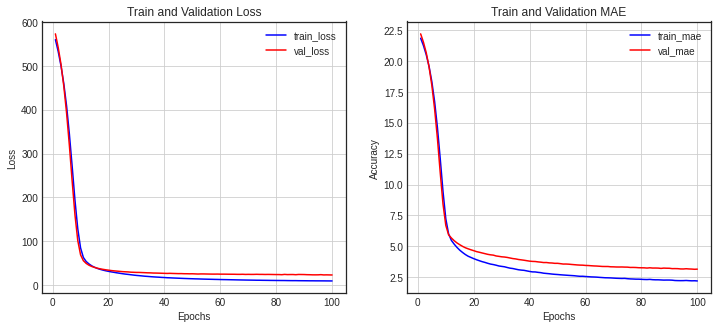

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 22.9992 - mae: 3.1545


[22.99919891357422, 3.15452241897583]